# ipython-cypher

`ipython-cypher` exposes `%cypher` magic in Jupyter. Install `ipython-cypher` with `pip install ipython-cypher`.

In [1]:
%load_ext cypher

## Cypher

`%cypher` is intended for one-line Cypher queries and `%%cypher` is intended for multi-line Cypher queries. Placing `%%cypher` above a Cypher query will display that query's results.

In [2]:
%%cypher
MATCH (person:Person)-[:LIKES]->(drink:Drink)
RETURN person.name, drink.name

3 rows affected.


person.name,drink.name
Nicole,Mountain Dew
Nicole,Coke Zero
Drew,Mountain Dew


## Pandas Data Frames

Cypher query results can be coerced to `pandas` data frames with the `get_dataframe` method. To assign Cypher query results to a variable, you need to use `%cypher` and separate lines with \\. You'll first need to install `pandas` with `pip install pandas`.

In [3]:
results = %cypher MATCH (person)-[:LIKES]->(drink:Drink) \
                  RETURN person.name AS name, drink.name AS drink
    
df = results.get_dataframe()

df

3 rows affected.


,name,drink
0,Nicole,Mountain Dew
1,Drew,Mountain Dew
2,Nicole,Coke Zero


In [4]:
df.index

Int64Index([0, 1, 2], dtype='int64')

In [5]:
df.iloc[[1]]

,name,drink
1,Drew,Mountain Dew


In [6]:
df["name"]

0    Nicole
1      Drew
2    Nicole
Name: name, dtype: object

# NetworkX Graphs

Cypher query results can be coerced to `NetworkX` MultiDiGraphs, graphs that permit multiple edges between nodes, with the `get_graph` method. You'll first need to install `NetworkX` with `pip install networkx`.

3 rows affected.


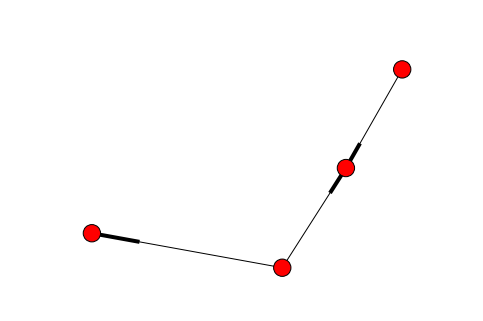

In [7]:
import networkx as nx
%matplotlib inline

results = %cypher MATCH p = (:Person)-[:LIKES]->(:Drink) RETURN p

g = results.get_graph()

nx.draw(g)

In [8]:
g.nodes(data=True)

[(u'319', {u'calories': 9000, 'labels': [u'Drink'], u'name': u'Mountain Dew'}),
 (u'318', {u'age': 20, 'labels': [u'Person'], u'name': u'Drew'}),
 (u'317', {u'age': 24, 'labels': [u'Person'], u'name': u'Nicole'}),
 (u'320', {u'calories': 0, 'labels': [u'Drink'], u'name': u'Coke Zero'})]

In [9]:
nx.degree(g)

{u'317': 2, u'318': 1, u'319': 2, u'320': 1}